In [16]:
# REQUIRED FUNCTIONS
import numpy as np
from scipy.stats import multivariate_normal
from scipy import linalg
import random
def velocity(phiDotl, phiDotr,r,w):
    omegadot = np.array([[0, -r*(phiDotr-phiDotl)/w, r*(phiDotl+phiDotr)/2], [r*(phiDotr-phiDotl)/w, 0, 0],[0, 0, 0]])   # Omegadot
    return omegadot 

# a function to randomly sample from a Guassian
def sample_from_Gaussian(mean,sigma):
    return np.random.normal(loc = mean, scale  = sigma)  # sigma is standard deviation

# Motion model
def motion_model(omega, Xt1i, dt):
    Xt2i = Xt1i@linalg.expm(omega*dt)
    return Xt2i


# QUESTION 3 C : Propogation step for the Particle Filter
def ParticleFilterPropogation(Xt1,t1,t2,r,w,sigma_l, sigma_r,pDotL,pDotR):
    dt = t2-t1
    Xt2 = [] 
    Lt2 = []
    for particle in Xt1:
        phiDotl = sample_from_Gaussian(pDotL,sigma_l)
        phiDotr = sample_from_Gaussian(pDotR,sigma_r)
        omegadot = velocity(phiDotl,phiDotr,r,w) 
        new_particle = motion_model(omegadot, particle,dt)
        Xt2.append(new_particle)
        Lt2.append(new_particle[0:2,particle.shape[1]-1])
    return Xt2,np.array(Lt2) 


# QUESTION 3 D : Particle Filter Update Step
def ParticleFilterUpdate(Xt_cap,Zt,sigma_p):
    N = len(Xt_cap)
    W = np.zeros((N,), dtype=float)  # Initializing W  
    for i in range(N):
        Xti_cap = Xt_cap[i]
        lti_cap = Xti_cap[0:2,-1]
        W[i] = multivariate_normal.pdf(Zt,lti_cap,sigma_p**2)
    
    W = W/W.sum()   # Weights normalized
  
    indices = random.choices(range(N), weights=W, k=N)   # New indices sampled
    Lt = np.zeros((N,2), dtype=float)  # Initializing translation posterior  
    Xt = []   # Initializing state posterior
    for i in range(N):
        Xti = Xt_cap[indices[i]]
        Xt.append(Xti)
        Lt[i,:] = Xti[0:2,-1]
    
    return Xt, Lt

In [17]:
#  NECESSARY IMPORTS AND VARIABLE INITIALIZATIONS
import numpy as np
import matplotlib.pyplot as plt
x0 = np.array([[1,0,0],[0,1,0],[0,0,1]])     # Initial pose

N = 1000
X0 = []   #  A list to hold 1000 copies of the initial pose

for i in range(0,1000):
    X0.append(x0)

t1 = 0
t2 = 10
phiDotl = 1.5
phiDotr = 2
r = 0.25
w = 0.5
sigma_l = 0.05
sigma_r = 0.05
sigma_p = .10

Mean for question e is as follows
[1.07187509 3.07908869]
Covariance for question e is as follows
[[0.38551582 0.03299742]
 [0.03299742 0.01934609]]


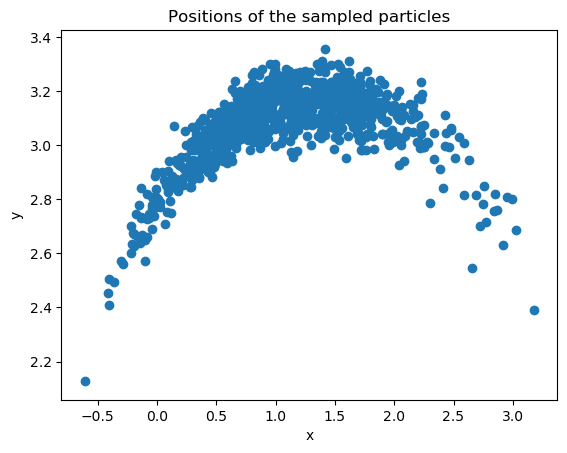

In [18]:
############# QUESTION E #############
X10_cap,Lt10_cap = ParticleFilterPropogation(X0,t1,t2,r,w,sigma_l,sigma_r,phiDotl,phiDotr)
# print(X10_cap)
mean = np.mean(Lt10_cap, axis = 0)
print("Mean for question e is as follows")
print(mean)
print("Covariance for question e is as follows")
covariance = np.cov(Lt10_cap.T)
print(covariance)
plt.scatter(Lt10_cap[:,0],Lt10_cap[:,1])
plt.title("Positions of the sampled particles")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

Covariance for t =  5
[[ 0.02133261 -0.01702851]
 [-0.01702851  0.01684901]]
Mean for t =  5
[1.64640201 1.19430375]
Covariance for t =  10
[[0.2688289  0.0038805 ]
 [0.0038805  0.01527719]]
Mean for t =  10
[1.03778995 3.10510647]
Covariance for t =  15
[[0.30155418 0.23504297]
 [0.23504297 0.35001381]]
Mean for t =  15
[-0.93510528  3.13873156]
Covariance for t =  20
[[ 0.2443961  -0.10661439]
 [-0.10661439  0.63064389]]
Mean for t =  20
[-1.57118548  1.30874983]


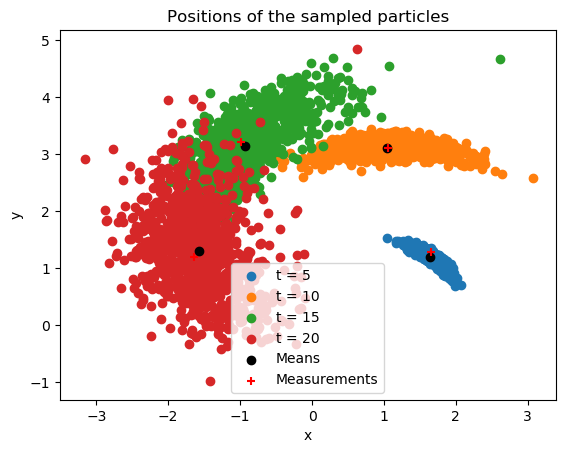

In [19]:
############# DEAD RECKONING #############
Z = [np.array([1.6561,1.2847]),np.array([1.0505,3.1059]),np.array([-0.9875,3.2118]),np.array([-1.6450,1.1978])]
T = [5,10,15,20]
means_DR = np.zeros((4,2), dtype=float) 
states_DR = []

covariances_DR = []
Xt1 = X0
fig1 = plt.figure("Dead Reckoning")
for i in range(0,4):
    Zt = Z[i]
    t2 = T[i]
    Xt2_cap,Lt2_cap = ParticleFilterPropogation(Xt1,t1,t2,r,w,sigma_l,sigma_r,phiDotl,phiDotr)
    means_DR[i,:] = np.mean(Lt2_cap, axis = 0)
    covariances_DR.append(np.cov(Lt2_cap.T))
    print("Covariance for t = ",T[i])
    print(np.cov(Lt2_cap.T))
    print("Mean for t = ",T[i])
    print(np.mean(Lt2_cap, axis = 0))
    states_DR.append(Xt2_cap)
    Xt1 = Xt2_cap
    t1 = t2
    plt.scatter(Lt2_cap[:,0],Lt2_cap[:,1])


Z1 = np.array(Z)
plt.scatter(means_DR[:,0],means_DR[:,1],color =  'black',marker = 'o')
plt.scatter(Z1[:,0],Z1[:,1],color = 'red',marker = '+')
plt.title("Positions of the sampled particles")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["t = 5", "t = 10", "t = 15", "t = 20","Means","Measurements"])
plt.show()


Covariance for t =  5
[[ 0.00499131 -0.00300983]
 [-0.00300983  0.00380904]]
Mean for t =  5
[1.63537703 1.22563405]
Covariance for t =  10
[[0.00824588 0.00089103]
 [0.00089103 0.00407538]]
Mean for t =  10
[1.0395143  3.13447808]
Covariance for t =  15
[[0.00562349 0.0001205 ]
 [0.0001205  0.00950571]]
Mean for t =  15
[-1.00125312  3.20486456]
Covariance for t =  20
[[ 0.00830952 -0.0011683 ]
 [-0.0011683   0.00687446]]
Mean for t =  20
[-1.64759356  1.22799902]


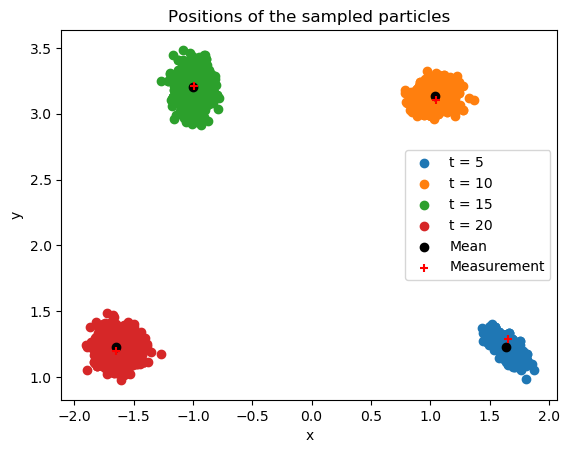

In [20]:
############# UPDATE USING NOISY MEASUREMENTS  #############
Z = [np.array([1.6561,1.2847]),np.array([1.0505,3.1059]),np.array([-0.9875,3.2118]),np.array([-1.6450,1.1978])]
# Z = np.array(Z)
Xt1 = X0
T = [5,10,15,20]
states = []
Lt = []
means = np.zeros((4,2), dtype=float) 
covariances = []
errors = []
t1 = 0
fig2 = plt.figure("Posteriors")
for i in range(4):
    t2 = T[i]
    Xt2_cap,Lt2_cap = ParticleFilterPropogation(Xt1,t1,t2,r,w,sigma_l,sigma_r,phiDotl,phiDotr)
   
    Xt2,Lt2= ParticleFilterUpdate(Xt2_cap,Z[i],sigma_p)
    means[i,:] = np.mean(Lt2, axis = 0)
    covariances.append(np.cov(Lt2.T))
    print("Covariance for t = ",T[i])
    print(np.cov(Lt2.T))
    print("Mean for t = ",T[i])
    print(np.mean(Lt2, axis = 0))
    states.append(Xt2)
    Lt.append(Lt2)
    Xt1 = Xt2
    t1 = t2
    # col = (np.random.random(), np.random.random(), np.random.random())
    plt.scatter(Lt2[:,0],Lt2[:,1])

Z = np.array(Z)
plt.scatter(means[:,0],means[:,1],color =  'black',marker = 'o')
plt.scatter(Z[:,0],Z[:,1],color = 'red',marker = '+')
plt.legend(["t = 5", "t = 10", "t = 15", "t = 20","Mean","Measurement"])
plt.title("Positions of the sampled particles")
plt.xlabel("x")
plt.ylabel("y")
plt.show()